# Seattle Airbnb CRISP-DM Project
## Airbnb Dataset - Seattle, WA
### Sajid Al Sanai
08/07/2022

---

In [1655]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [1656]:
dl = pd.read_csv('./listings.csv')
dr = pd.read_csv('./reviews.csv')
dc = pd.read_csv('./calendar.csv')

---

### CRISP-DM
The **CRISP-DM Process** involves the following steps:
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modelling
5. Evaluation
6. Deployment

___

### 1. Business Understanding

On a preliminary review of the data schema, I am interested in finding some answers to the following questions:
1. What are the highest rated areas to to reserve accomodations in Seattle?
2. What are the highest revenue generating neighbourhoods in Seattle?
3. Which scores are most important to overall ratings? (Linear Regression)
4. Do hosts with higher ratings overall earn higher revenue? (Linear Regression)
5. What are the most widely provided amenities listed by hosts in Seattle?
6. Which amenities, housing characteristics, and factors contribute positively to revenue? (Linear Regression)
7. Which amenities, housing characteristics, and factors contribute positively to ratings? (Linear Regression)

___

### 2. Data Understanding

Airbnb data provided is for the city of Seattle, WA during the period of 2016-2017:

1. **Listings.csv** contains details of properties and pricing
2. **Reviews.csv** contains reviews after home-stays
3. **Calendar.csv** contains pricing for listings on specific days

**Investigating Features and Data Type**

In [1657]:
dl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

There are 92 features of mixed type. Certain features do not adhere to the anticipated data type and will require cleaning and preparation.

In [1658]:
dr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


There are 6 features of mixed type. Features appear to adhere to their anticipated data types, but some transformation may be required for string data.

In [1659]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


There are 4 features of mixed type. Certain features like price do not adhere to the anticipated data type and will require cleaning and preparation.

In [1660]:
dl.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


The following are summary statistics of numeric features in listings.

In [1661]:
pd.set_option('display.max_rows', None)
dl.describe().T
pd.set_option('display.max_rows', 10)

We investigate a list of features which are of an unanticipated data type or are ambiguous in content in *Listings* in order to gain a full understanding:

In [1662]:
investigate_features = [
'host_response_time',
'host_response_rate',
'host_acceptance_rate',
'host_is_superhost',
'host_verifications',
'host_has_profile_pic',
'host_identity_verified',
'neighbourhood_cleansed',
'neighbourhood_group_cleansed',
'zipcode',
'market',
'smart_location',
'is_location_exact',
'price',
'weekly_price',
'monthly_price',
'security_deposit',
'cleaning_fee',
'extra_people',
'calendar_updated',
'has_availability',
'calendar_last_scraped',
'requires_license',
'license',
'instant_bookable',
'cancellation_policy',
'require_guest_profile_picture',
'require_guest_phone_verification'
]

In [1663]:
for feature in investigate_features:
    print('{}:'.format(feature))
    print(dl[feature].unique()[:10])
    print('')

host_response_time:
['within a few hours' 'within an hour' nan 'within a day'
 'a few days or more']

host_response_rate:
['96%' '98%' '67%' nan '100%' '71%' '97%' '60%' '50%' '31%']

host_acceptance_rate:
['100%' nan '0%']

host_is_superhost:
['f' 't' nan]

host_verifications:
["['email', 'phone', 'reviews', 'kba']"
 "['email', 'phone', 'facebook', 'linkedin', 'reviews', 'jumio']"
 "['email', 'phone', 'google', 'reviews', 'jumio']"
 "['email', 'phone', 'facebook', 'reviews', 'jumio']"
 "['email', 'phone', 'facebook', 'reviews', 'kba']"
 "['email', 'phone', 'facebook', 'google', 'linkedin', 'reviews', 'jumio']"
 "['email', 'phone', 'facebook', 'linkedin', 'reviews', 'kba']"
 "['email', 'phone', 'linkedin', 'reviews', 'jumio']"
 "['email', 'reviews', 'kba']"
 "['email', 'phone', 'linkedin', 'reviews', 'kba']"]

host_has_profile_pic:
['t' 'f' nan]

host_identity_verified:
['t' 'f' nan]

neighbourhood_cleansed:
['West Queen Anne' 'Adams' 'West Woodland' 'East Queen Anne' 'Wallingford'
 'N

**Features which are non-numeric but should be numeric include:**
1. 'price'
2. 'weekly_price'
3. 'monthly_price'
4. 'security_deposit'
5. 'cleaning_fee'
6. 'extra_people'
7. 'host_response_rate'
8. 'host_acceptance_rate'
9. 'zipcode' *(keep as non-numeric categorical)*

These all represent dollar amounts or percentages and have been formatted as strings with '$', ',', and '%' punctuation. Zipcode specifically contains errata through addition of escape characters and should be a regular integer.

**Features which are non-numeric and are categorical booleans include:**
1. 'host_has_profile_pic'
2. 'host_identity_verified'
3. 'is_location_exact'
4. 'has_availability'
5. 'requires_license'
6. 'instant_bookable'
7. 'require_guest_profile_picture'
8. 'require_guest_phone_verification'

These represent true or false boolean categorical data. These require one-hot encoding.

**Features which are non-numeric and are categorical and may exhibit ordinality include:**
1. 'host_response_time
2. 'host_is_superhost'
3. 'calendar_updated'
4. 'cancellation_policy'

**Features which are already pre-cleaned and non-numeric categorical:**
1. 'neighbourhood_cleansed'
2. 'neighbourhood_group_cleansed'

In [1664]:
dr.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


Data in Reviews is orthodox without need for conversion.

In [1665]:
dc.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


**Investigating Missing Values**

In [1666]:
def find_missing(data):
    '''
    INPUT:
    data - DataFrame containing values.
    OUTPUT:
    DataFrame - DataFrame containing missing values count & percentage by feature, only if missing
    '''
    missing_pc = [sum(data[x].isna() == True) / data.shape[0] for x in data.columns]
    missing = [sum(data[x].isna() == True) for x in data.columns]
    out = pd.DataFrame([data.columns, missing, missing_pc]).T
    out.columns = ['Feature', 'Missing', 'Missing %']
    out = out[out['Missing'] > 0]
    return out

In [1667]:
missing = find_missing(data=dl)
display('Listings - % Missing')
pd.set_option('display.max_rows', None)
display(missing)
pd.set_option('display.max_rows', 10)

'Listings - % Missing'

,Feature,Missing,Missing %
5,summary,177,0.0463594
6,space,569,0.149031
9,neighborhood_overview,1032,0.270299
10,notes,1606,0.420639
11,transit,934,0.244631
12,thumbnail_url,320,0.0838135
13,medium_url,320,0.0838135
15,xl_picture_url,320,0.0838135
18,host_name,2,0.000523834
19,host_since,2,0.000523834


In [1668]:
missing = find_missing(data=dr)
display('Reviews - % Missing')
display(missing)

'Reviews - % Missing'

,Feature,Missing,Missing %
5,comments,18,0.000212142


In [1669]:
missing = find_missing(data=dc)
display('Calendar - % Missing')
display(missing)

'Calendar - % Missing'

,Feature,Missing,Missing %
3,price,459028,0.32939


With regards to the aforementioned questions I seek to investigate detailed in the prior section, I feel the features of specific interest for me would be as follows:
- Listings
    1. listing_id
    2. host_response_rate
    3. host_acceptance_rate
    4. host_is_superhost
    5. host_total_listings_count
    6. host_identity_verified
    7. neighbourhood_cleansed
    8. neighbourhood_group_cleansed
    9. latitude
    10. longitude
    11.  property_type
    12.  room_type
    13.  accommodates
    14.  bathrooms
    15.  bedrooms
    16.  beds
    17.  amenities
    18.  price
    19.  security_deposit
    20.  cleaning_fee
    21.  extra_people
    22.  minimum_nights
    23.  number_of_reviews
    24.  review_scores_rating
    25.  review_scores_accuracy
    26.  review_scores_cleanliness
    27.  review_scores_checkin
    28.  review_scores_communication
    29.  review_scores_location
    30.  review_scores_value
    31.  instant_bookable
    32.  cancellation_policy
    33.  reviews_per_month
- Reviews
    1. listing_id
    2. id
- Calendar
    1. n/a

___

### 3. Data Preparation

In [1670]:
data = dl.copy()

In [1671]:
data.rename(columns={'id': 'listing_id'}, inplace=True)

**Numeric Features**

In [1672]:
data['host_response_rate'] = data['host_response_rate'].str.replace('[% ]', '').astype(float)
data['host_response_rate'] = data['host_response_rate'] * .01

In [1673]:
data['host_acceptance_rate'].unique()

array(['100%', nan, '0%'], dtype=object)

In [1674]:
data['host_acceptance_rate'] = data['host_acceptance_rate'].str.replace('[% ]', '').astype(float)
data['host_acceptance_rate'] = data['host_acceptance_rate'] * .01

In [1675]:
data['host_is_superhost'].replace('t', 1, inplace=True)
data['host_is_superhost'].replace('f', 0, inplace=True)
sum(data['host_is_superhost'].isna()==True)

2

In [1676]:
data['host_identity_verified'].replace('t', 1, inplace=True)
data['host_identity_verified'].replace('f', 0, inplace=True)
sum(data['host_identity_verified'].isna()==True)

2

In [1677]:
data['price'] = data['price'].str.replace('[$, ]', '').astype(float)
data['security_deposit'] = data['security_deposit'].str.replace('[$, ]', '').astype(float)
data['cleaning_fee'] = data['cleaning_fee'].str.replace('[$, ]', '').astype(float)
data['extra_people'] = data['extra_people'].str.replace('[$, ]', '').astype(float)

In [1678]:
data['instant_bookable'].replace('t', 1, inplace=True)
data['instant_bookable'].replace('f', 0, inplace=True)
sum(data['instant_bookable'].isna()==True)

0

**Categorical Features**

In [1679]:
data['neighbourhood_cleansed'].unique()

array(['West Queen Anne', 'Adams', 'West Woodland', 'East Queen Anne',
       'Wallingford', 'North Queen Anne', 'Green Lake', 'Westlake',
       'Mann', 'Madrona', 'University District', 'Harrison/Denny-Blaine',
       'Minor', 'Leschi', 'Atlantic', 'Pike-Market', 'Eastlake',
       'South Lake Union', 'Lawton Park', 'Briarcliff', 'Belltown',
       'International District', 'Central Business District',
       'First Hill', 'Yesler Terrace', 'Pioneer Square', 'Gatewood',
       'Arbor Heights', 'Alki', 'North Admiral', 'Crown Hill',
       'Fairmount Park', 'Genesee', 'Interbay', 'Industrial District',
       'Mid-Beacon Hill', 'South Beacon Hill', 'Greenwood', 'Holly Park',
       'Fauntleroy', 'North Beacon Hill', 'Mount Baker', 'Brighton',
       'South Delridge', 'View Ridge', 'Dunlap', 'Rainier Beach',
       'Columbia City', 'Seward Park', 'North Delridge', 'Maple Leaf',
       'Ravenna', 'Riverview', 'Portage Bay', 'Bryant', 'Montlake',
       'Broadway', 'Loyal Heights', 'Vict

In [1680]:
data['neighbourhood_group_cleansed'].unique()

array(['Queen Anne', 'Ballard', 'Other neighborhoods', 'Cascade',
       'Central Area', 'University District', 'Downtown', 'Magnolia',
       'West Seattle', 'Interbay', 'Beacon Hill', 'Rainier Valley',
       'Delridge', 'Seward Park', 'Northgate', 'Capitol Hill',
       'Lake City'], dtype=object)

In [1681]:
data['property_type'].unique()

array(['Apartment', 'House', 'Cabin', 'Condominium', 'Camper/RV',
       'Bungalow', 'Townhouse', 'Loft', 'Boat', 'Bed & Breakfast',
       'Other', 'Dorm', 'Treehouse', 'Yurt', 'Chalet', 'Tent', nan],
      dtype=object)

In [1682]:
data['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [1683]:
data['cancellation_policy'].unique()

array(['moderate', 'strict', 'flexible'], dtype=object)

**Imputing Missing Values**

In [1684]:
data['host_response_rate'] = data['host_response_rate'].fillna(data.groupby('neighbourhood_cleansed')['host_response_rate'].transform('median'))

In [1685]:
data['host_acceptance_rate'].fillna(0, inplace=True)

In [1686]:
for listing in data[data['host_total_listings_count'].isna() == True]['listing_id']:
    display('[{}] has {} listing.'.format(listing, data[data['listing_id'] == listing].shape[0]))

'[8354452] has 1 listing.'

'[10235014] has 1 listing.'

In [1687]:
data['host_total_listings_count'].fillna(1, inplace=True)

In [1688]:
data['host_total_listings_count'].unique()

array([  3.,   6.,   2.,   1.,   5.,   9.,   4.,  36., 354.,   8.,  37.,
         7.,  34.,  10.,  13.,  21.,  11., 169.,  48., 502.,  12.,  18.,
        19.,  15.,  84., 163.,  17.])

In [1689]:
data['host_is_superhost'].fillna(0, inplace=True)

In [1690]:
data['host_identity_verified'].fillna(0, inplace=True)

In [1691]:
data[data['property_type'].isna()==True]['description'].iloc[0]
data['property_type'].fillna('Apartment', inplace=True)

In [1692]:
display(data[data['bathrooms'].isna()==True][['bedrooms', 'bathrooms']])
data['bathrooms'].fillna(1, inplace=True)

,bedrooms,bathrooms
1242,1.0,NaN
1314,1.0,NaN
1357,2.0,NaN
1378,1.0,NaN
1961,1.0,NaN
...,...,...
2437,1.0,NaN
2698,1.0,NaN
2717,1.0,NaN
2953,1.0,NaN


In [1693]:
display(data[data['bedrooms'].isna()==True][['bedrooms', 'bathrooms', 'beds']])
data['bedrooms'].fillna(data.groupby('beds')['beds'].transform('median'), inplace=True)

,bedrooms,bathrooms,beds
1429,NaN,1.0,1.0
1492,NaN,1.0,1.0
1493,NaN,1.0,2.0
1853,NaN,1.0,1.0
2619,NaN,1.0,1.0
2915,NaN,1.0,1.0


In [1694]:
display(data[data['beds'].isna()==True][['bedrooms', 'bathrooms', 'beds']])
data['beds'].fillna(1, inplace=True)

,bedrooms,bathrooms,beds
1961,1.0,1.0,NaN


In [1695]:
data['minimum_nights'].unique()
data['minimum_nights'] = data['minimum_nights'].replace(1000, data['minimum_nights'].median())

In [1696]:
data['review_scores_rating'].fillna(data.groupby('neighbourhood_cleansed')['review_scores_rating'].transform('median'), inplace=True)
data['review_scores_accuracy'].fillna(data.groupby('neighbourhood_cleansed')['review_scores_accuracy'].transform('median'), inplace=True)
data['review_scores_cleanliness'].fillna(data.groupby('neighbourhood_cleansed')['review_scores_cleanliness'].transform('median'), inplace=True)
data['review_scores_checkin'].fillna(data.groupby('neighbourhood_cleansed')['review_scores_checkin'].transform('median'), inplace=True)
data['review_scores_communication'].fillna(data.groupby('neighbourhood_cleansed')['review_scores_communication'].transform('median'), inplace=True)
data['review_scores_location'].fillna(data.groupby('neighbourhood_cleansed')['review_scores_location'].transform('median'), inplace=True)
data['review_scores_value'].fillna(data.groupby('neighbourhood_cleansed')['review_scores_value'].transform('median'), inplace=True)

In [1697]:
data['reviews_per_month'].fillna(0, inplace=True)

In [1698]:
data['security_deposit'].fillna(0, inplace=True)
data['cleaning_fee'].fillna(0, inplace=True)
data['extra_people'].fillna(0, inplace=True)

**Feature Engineering**

In [1699]:
reservations = pd.merge(dr, data, on='listing_id')

In [1700]:
reservations['revenue'] = reservations['price'] * reservations['minimum_nights']
revenue = reservations[['listing_id', 'revenue']].groupby(['listing_id']).sum()

In [1701]:
data = pd.merge(data, revenue, on='listing_id', how='left')
data['revenue'].fillna(0, inplace=True)

In [1702]:
amenities = []
for amenity in data['amenities'].unique():
    amenities.extend(amenity.strip('{}').split(','))
amenities = pd.DataFrame(amenities)
amenities = pd.DataFrame(amenities[0].unique(), columns=['amenity'])
for i in range(len(amenities['amenity'])):
    for j in ['"']:
        amenities['amenity'].iloc[i] = re.sub(j, '', amenities['amenity'].iloc[i])
amenities.drop(amenities.index[36], inplace=True)

In [1703]:
amenity_types = amenities['amenity'].unique()
amenity = pd.DataFrame(data[['listing_id', 'amenities']])
for i in range(len(amenity_types)):
    for j in ['"', ' ', '/', '-', '\(', '\)']:
        amenity_types[i] = re.sub(j, '', amenity_types[i])
    amenity['amenity_{}'.format(amenity_types[i])] = 0

In [1704]:
for i in range(amenity.shape[0]):
    comparison = amenity['amenities'].iloc[i]
    comparison = comparison.strip('{}')
    for j in ['"', ' ', '/', '-', '\(', '\)']:
        comparison = re.sub(j, '', comparison)
    comparison = comparison.split(',')
    for idx in amenity_types:
        if idx in comparison:
            amenity['amenity_{}'.format(idx)].iloc[i] = 1

e:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1705]:
amenity.head()

,listing_id,amenities,amenity_TV,amenity_CableTV,amenity_Internet,amenity_WirelessInternet,amenity_AirConditioning,amenity_Kitchen,amenity_Heating,amenity_FamilyKidFriendly,...,amenity_SuitableforEvents,amenity_ElevatorinBuilding,amenity_LockonBedroomDoor,amenity_WheelchairAccessible,amenity_Gym,amenity_Pool,amenity_SmokingAllowed,amenity_Otherpets,amenity_Doorman,amenity_WasherDryer
0,241032,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,953595,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",1,0,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3308979,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,7421966,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",0,0,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,278830,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [1706]:
amenity.drop('amenities', axis=1, inplace=True)

In [1707]:
data = pd.merge(data, amenity, on='listing_id')

**Feature Encoding**

In [1708]:
from sklearn.preprocessing import OneHotEncoder

In [1709]:
one_hot_encoder = OneHotEncoder(sparse=False)

In [1710]:
ohe_neighbourhood_group_cleansed = pd.DataFrame(one_hot_encoder.fit_transform(data['neighbourhood_group_cleansed'].to_numpy().reshape(-1, 1)), columns=one_hot_encoder.get_feature_names())
ohe_neighbourhood_group_cleansed.columns = [x.replace('x0', 'nbdg') for x in ohe_neighbourhood_group_cleansed.columns]
ohe_neighbourhood_group_cleansed['listing_id'] = data['listing_id']

In [1711]:
ohe_property_type = pd.DataFrame(one_hot_encoder.fit_transform(data['property_type'].to_numpy().reshape(-1, 1)), columns=one_hot_encoder.get_feature_names())
ohe_property_type.columns = [x.replace('x0', 'property') for x in ohe_property_type.columns]
ohe_property_type['listing_id'] = data['listing_id']

In [1712]:
ohe_room_type = pd.DataFrame(one_hot_encoder.fit_transform(data['room_type'].to_numpy().reshape(-1, 1)), columns=one_hot_encoder.get_feature_names())
ohe_room_type.columns = [x.replace('x0', 'room') for x in ohe_room_type.columns]
ohe_room_type['listing_id'] = data['listing_id']

In [1713]:
ohe_cancellation_policy = pd.DataFrame(one_hot_encoder.fit_transform(data['cancellation_policy'].to_numpy().reshape(-1, 1)), columns=one_hot_encoder.get_feature_names())
ohe_cancellation_policy.columns = [x.replace('x0', 'cancel') for x in ohe_cancellation_policy.columns]
ohe_cancellation_policy['listing_id'] = data['listing_id']

**Feature Scaling**

In [1714]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [1715]:
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

In [1716]:
data['beds'] = standard_scaler.fit_transform(data['beds'].to_numpy().reshape(-1, 1))
data['bedrooms'] = standard_scaler.fit_transform(data['bedrooms'].to_numpy().reshape(-1, 1))
data['bathrooms'] = standard_scaler.fit_transform(data['bathrooms'].to_numpy().reshape(-1, 1))
data['accommodates'] = standard_scaler.fit_transform(data['accommodates'].to_numpy().reshape(-1, 1))
data['host_total_listings_count'] = standard_scaler.fit_transform(data['host_total_listings_count'].to_numpy().reshape(-1, 1))
data['review_scores_accuracy'] = standard_scaler.fit_transform(data['review_scores_accuracy'].to_numpy().reshape(-1, 1))
data['review_scores_cleanliness'] = standard_scaler.fit_transform(data['review_scores_cleanliness'].to_numpy().reshape(-1, 1))
data['review_scores_checkin'] = standard_scaler.fit_transform(data['review_scores_checkin'].to_numpy().reshape(-1, 1))
data['review_scores_communication'] = standard_scaler.fit_transform(data['review_scores_communication'].to_numpy().reshape(-1, 1))
data['review_scores_location'] = standard_scaler.fit_transform(data['review_scores_location'].to_numpy().reshape(-1, 1))
data['review_scores_value'] = standard_scaler.fit_transform(data['review_scores_value'].to_numpy().reshape(-1, 1))
#data['number_of_reviews'] = standard_scaler.fit_transform(data['number_of_reviews'].to_numpy().reshape(-1, 1))
data['reviews_per_month'] = standard_scaler.fit_transform(data['reviews_per_month'].to_numpy().reshape(-1, 1))

In [1717]:
data['beds'] = min_max_scaler.fit_transform(data['beds'].to_numpy().reshape(-1, 1))
data['bedrooms'] = min_max_scaler.fit_transform(data['bedrooms'].to_numpy().reshape(-1, 1))
data['bathrooms'] = min_max_scaler.fit_transform(data['bathrooms'].to_numpy().reshape(-1, 1))
data['accommodates'] = min_max_scaler.fit_transform(data['accommodates'].to_numpy().reshape(-1, 1))
data['host_total_listings_count'] = min_max_scaler.fit_transform(data['host_total_listings_count'].to_numpy().reshape(-1, 1))
data['review_scores_accuracy'] = min_max_scaler.fit_transform(data['review_scores_accuracy'].to_numpy().reshape(-1, 1))
data['review_scores_cleanliness'] = min_max_scaler.fit_transform(data['review_scores_cleanliness'].to_numpy().reshape(-1, 1))
data['review_scores_checkin'] = min_max_scaler.fit_transform(data['review_scores_checkin'].to_numpy().reshape(-1, 1))
data['review_scores_communication'] = min_max_scaler.fit_transform(data['review_scores_communication'].to_numpy().reshape(-1, 1))
data['review_scores_location'] = min_max_scaler.fit_transform(data['review_scores_location'].to_numpy().reshape(-1, 1))
data['review_scores_value'] = min_max_scaler.fit_transform(data['review_scores_value'].to_numpy().reshape(-1, 1))
#data['number_of_reviews'] = min_max_scaler.fit_transform(data['number_of_reviews'].to_numpy().reshape(-1, 1))
data['reviews_per_month'] = min_max_scaler.fit_transform(data['reviews_per_month'].to_numpy().reshape(-1, 1))

**Constructing Features Dataset**

In [1718]:
# One Hot Encoded Features
encoded_features = amenity.columns[1:].to_list()
encoded_features.extend(ohe_neighbourhood_group_cleansed.columns)
encoded_features.extend(ohe_property_type.columns)
encoded_features.extend(ohe_room_type.columns)
encoded_features.extend(ohe_cancellation_policy.columns)
for i in range(4):
    encoded_features.remove('listing_id')

In [1719]:
# Standard Scaled Features
scaled_features = ['host_response_rate',
'host_acceptance_rate',
'host_total_listings_count',
'accommodates',
'bathrooms',
'bedrooms',
'beds',
'review_scores_accuracy',
'review_scores_cleanliness',
'review_scores_checkin',
'review_scores_communication',
'review_scores_location',
'review_scores_value',
'reviews_per_month'
]

In [1720]:
# Numeric Features
numeric_features = ['latitude',
'longitude',
'price',
'security_deposit',
'cleaning_fee',
'extra_people',
'number_of_reviews'
]

In [1721]:
# Categorical Binary Dummies
categorical_features = ['host_is_superhost',
'host_identity_verified',
'instant_bookable'
]

In [1722]:
# Constructing the Features Dataset
X = pd.DataFrame(data['listing_id'])
X = pd.merge(X, ohe_neighbourhood_group_cleansed, on='listing_id')
X = pd.merge(X, ohe_property_type, on='listing_id')
X = pd.merge(X, ohe_room_type, on='listing_id')
X = pd.merge(X, ohe_cancellation_policy, on='listing_id')
X[scaled_features] = data[scaled_features]
X[numeric_features] = data[numeric_features]
X[categorical_features] = data[categorical_features]

**Reviewing Prepared Dataset**

In [1723]:
X.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818 entries, 0 to 3817
Data columns (total 64 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   listing_id                   3818 non-null   int64  
 1   nbdg_Ballard                 3818 non-null   float64
 2   nbdg_Beacon Hill             3818 non-null   float64
 3   nbdg_Capitol Hill            3818 non-null   float64
 4   nbdg_Cascade                 3818 non-null   float64
 5   nbdg_Central Area            3818 non-null   float64
 6   nbdg_Delridge                3818 non-null   float64
 7   nbdg_Downtown                3818 non-null   float64
 8   nbdg_Interbay                3818 non-null   float64
 9   nbdg_Lake City               3818 non-null   float64
 10  nbdg_Magnolia                3818 non-null   float64
 11  nbdg_Northgate               3818 non-null   float64
 12  nbdg_Other neighborhoods     3818 non-null   float64
 13  nbdg_Queen Anne   

In [1724]:
pd.set_option('display.max_rows', None)
display(X.describe().T)
pd.set_option('display.max_rows', 10)

,count,mean,std,min,25%,50%,75%,max
listing_id,3818.0,5.550111e+06,2.962660e+06,3335.000000,3.258256e+06,6.118244e+06,8.035127e+06,1.034016e+07
nbdg_Ballard,3818.0,6.024096e-02,2.379639e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
nbdg_Beacon Hill,3818.0,3.090623e-02,1.730864e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
nbdg_Capitol Hill,3818.0,1.485071e-01,3.556485e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
nbdg_Cascade,3818.0,2.331063e-02,1.509080e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
nbdg_Central Area,3818.0,9.664746e-02,2.955158e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
nbdg_Delridge,3818.0,2.069146e-02,1.423680e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
nbdg_Downtown,3818.0,1.388161e-01,3.457998e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
nbdg_Interbay,3818.0,2.881090e-03,5.360542e-02,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
nbdg_Lake City,3818.0,1.754845e-02,1.313203e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


___

### 4. Modelling

**Exploratory Analysis**

<AxesSubplot:>

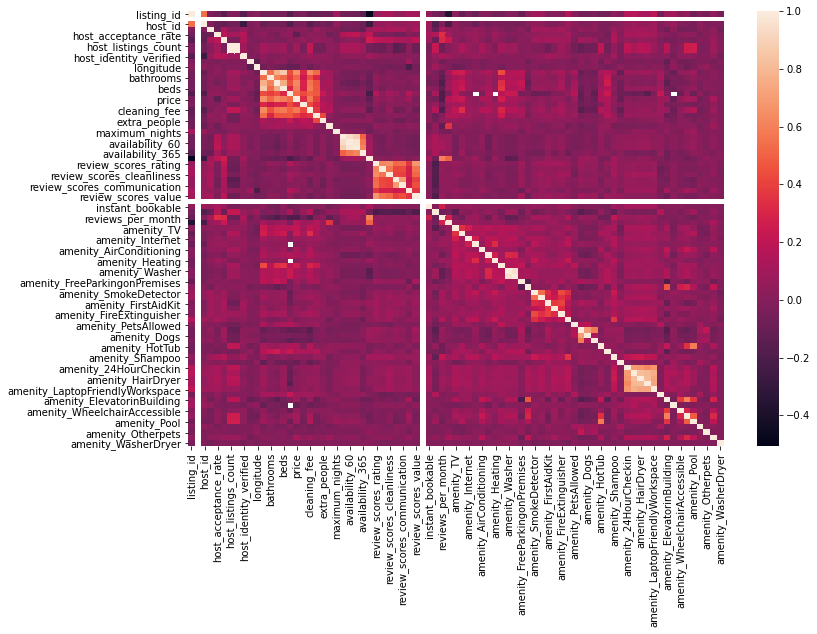

In [1725]:
sns.heatmap(data.corr())

In [1726]:
def chart_numeric_feature(dataset, feature):
    fig, ax = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.2, .8)}, figsize=(12, 8))

    sns.boxplot(data=dataset, x=feature, ax=ax[0])
    ax[0].set_title(f'{feature} Distribution Boxplot')

    sns.histplot(data=dataset, x=feature, kde=True, ax=ax[1])
    ax[1].set_title(f'{feature} Distribution Histogram')

    plt.show()

In [1727]:
def chart_numeric_feature_by_target(dataset, target):
    fig, ax = plt.subplots(4, 2, figsize=(20, 50))
    ax = ax.flatten()

    for counter, feature in enumerate(dataset):
        if counter < len(dataset):
            sns.histplot(data=dataset, x=feature, kde=True, hue=target, ax=ax[counter])
            ax[counter].set_title('{} Histogram: {}'.format(feature, target))
        else:
            sns.countplot(data=dataset, x=feature, hue=target, ax=ax[counter])
            ax[counter].set_title('{} Bar Chart: {}'.format(feature, target))

    plt.show()

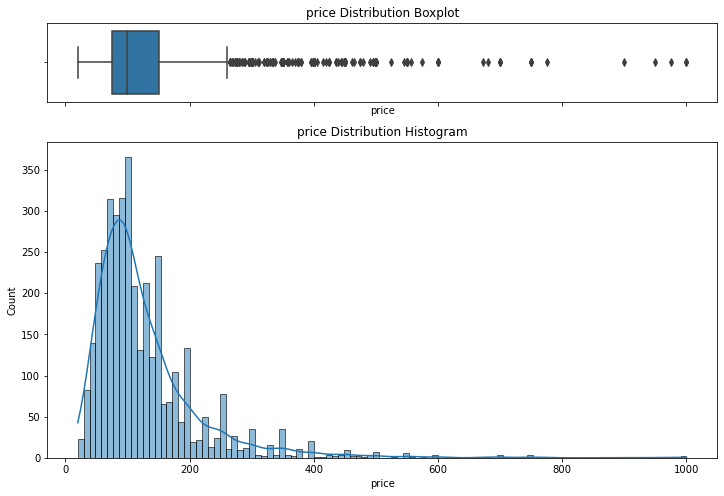

In [1728]:
chart_numeric_feature(data, 'price')

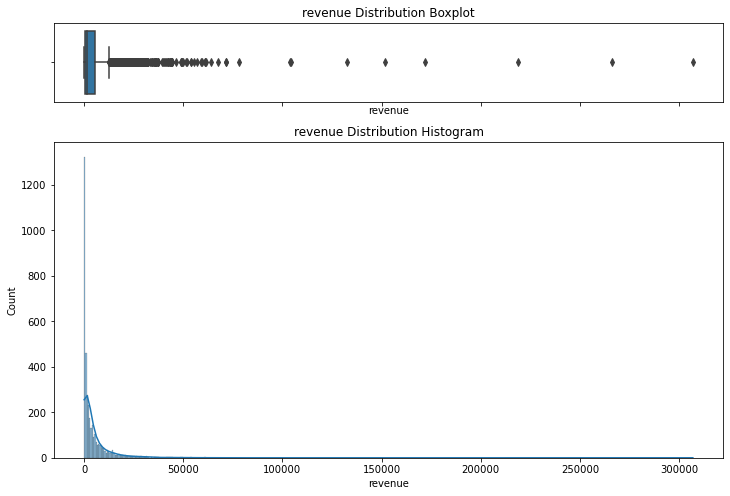

In [1729]:
chart_numeric_feature(data, 'revenue')

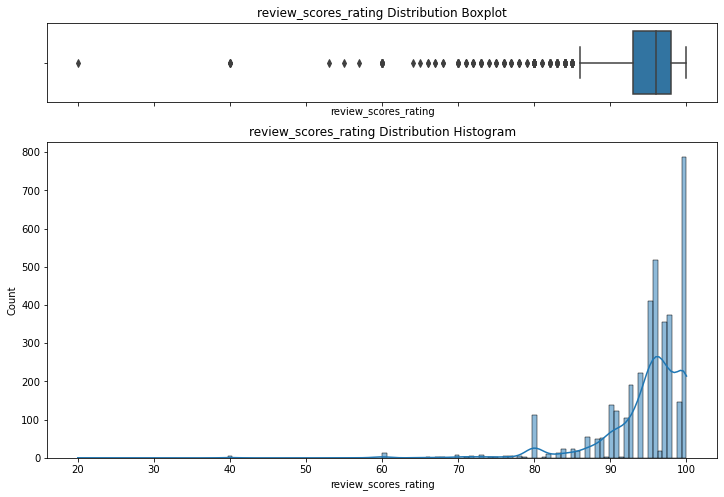

In [1730]:
chart_numeric_feature(data, 'review_scores_rating')

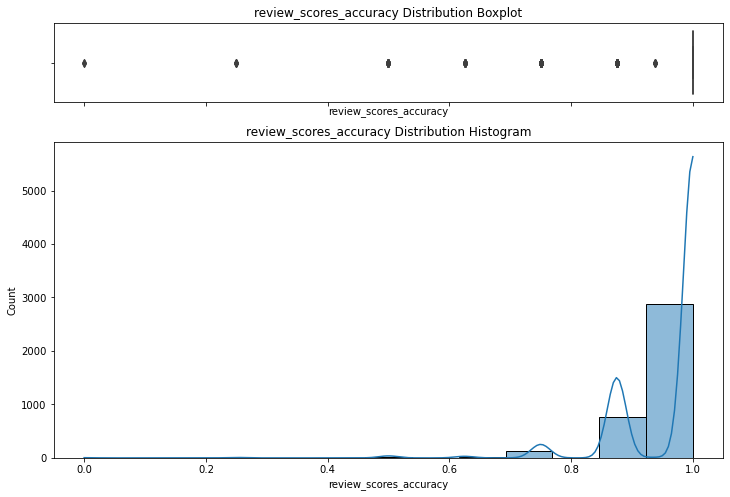

In [1731]:
chart_numeric_feature(data, 'review_scores_accuracy')

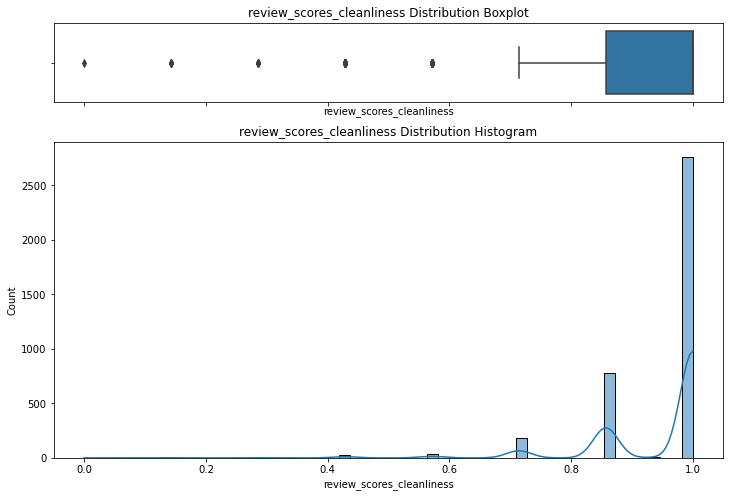

In [1732]:
chart_numeric_feature(data, 'review_scores_cleanliness')

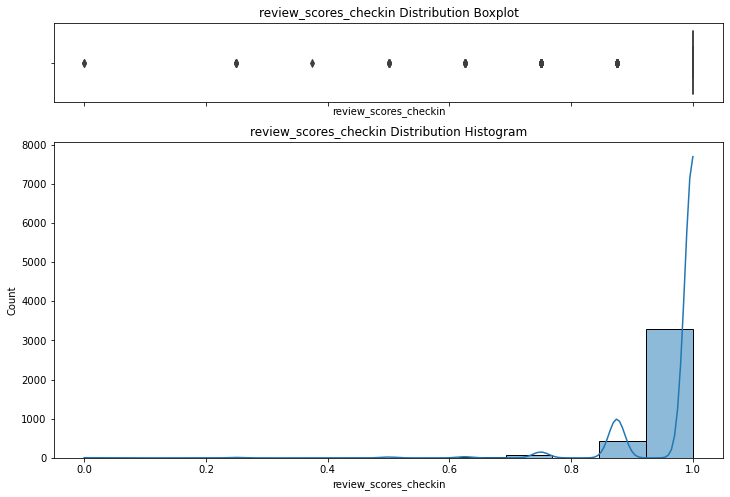

In [1733]:
chart_numeric_feature(data, 'review_scores_checkin')

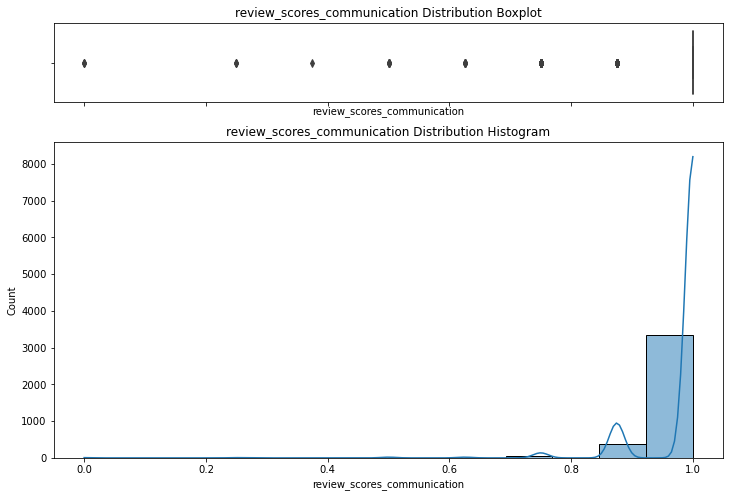

In [1734]:
chart_numeric_feature(data, 'review_scores_communication')

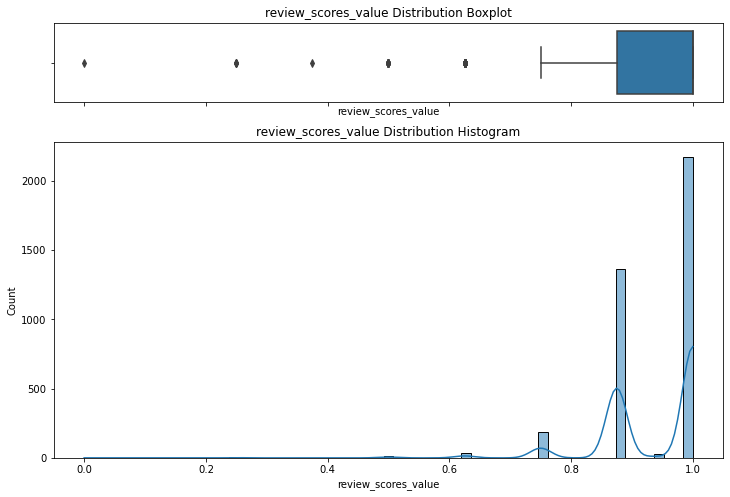

In [1735]:
chart_numeric_feature(data, 'review_scores_value')

In [1736]:
highest_rated_areas = pd.DataFrame(data['neighbourhood_group_cleansed'].unique(), columns=['area'])
mean_rating = []
mean_revenue = []
mean_latitude = []
mean_longitude = []
for area in highest_rated_areas['area'].unique():
    mean_rating.append(data[data['neighbourhood_group_cleansed'] == area]['review_scores_rating'].mean())
    mean_revenue.append(data[data['neighbourhood_group_cleansed'] == area]['revenue'].mean())
    mean_latitude.append(data[data['neighbourhood_group_cleansed'] == area]['latitude'].mean())
    mean_longitude.append(data[data['neighbourhood_group_cleansed'] == area]['longitude'].mean())
highest_rated_areas['mean_rating'] = mean_rating
highest_rated_areas['mean_revenue'] = mean_revenue
highest_rated_areas['mean_latitude'] = mean_latitude
highest_rated_areas['mean_longitude'] = mean_longitude

In [1737]:
highest_rated_areas

,area,mean_rating,mean_revenue,mean_latitude,mean_longitude
0,Queen Anne,95.701695,6038.752542,47.634047,-122.357751
1,Ballard,95.686957,6078.726087,47.674525,-122.380150
2,Other neighborhoods,94.785894,4409.843829,47.670646,-122.335808
3,Cascade,93.730337,4075.134831,47.633757,-122.331631
4,Central Area,96.163957,4636.371274,47.607715,-122.301760
...,...,...,...,...,...
12,Delridge,95.987342,3641.189873,47.545983,-122.362599
13,Seward Park,95.022727,4063.500000,47.554276,-122.268686
14,Northgate,94.912500,2962.362500,47.702454,-122.325100
15,Capitol Hill,94.414462,4951.910053,47.623578,-122.316462


**1. What are the highest rated areas to to reserve accomodations in Seattle?**

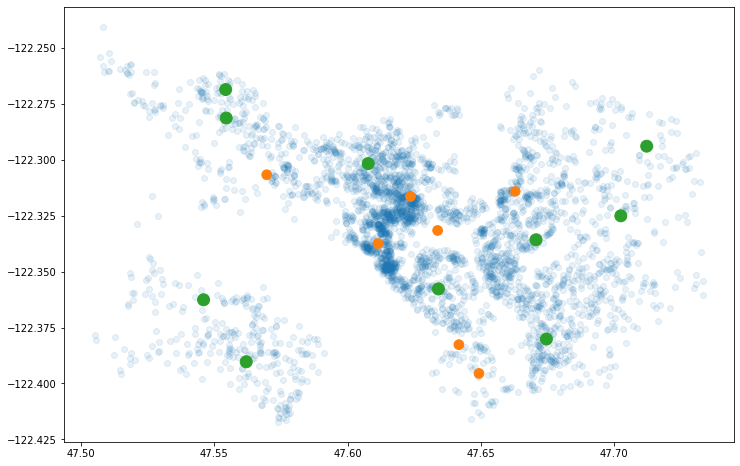

In [1738]:
plt.scatter(data['latitude'], data['longitude'], alpha=0.1)
plt.scatter(highest_rated_areas['mean_latitude'], highest_rated_areas['mean_longitude'], highest_rated_areas['mean_rating'])
filtered_areas = highest_rated_areas.sort_values('mean_rating', ascending=False)[0:10]
plt.scatter(filtered_areas['mean_latitude'], filtered_areas['mean_longitude'], filtered_areas['mean_rating'] * 1.5)
plt.rcParams['figure.figsize'] = [12, 8]
plt.show()

In [1739]:
display(highest_rated_areas[['area', 'mean_rating']].sort_values('mean_rating', ascending=False)[:10])

,area,mean_rating
4,Central Area,96.163957
8,West Seattle,96.061576
12,Delridge,95.987342
0,Queen Anne,95.701695
1,Ballard,95.686957
13,Seward Park,95.022727
14,Northgate,94.912500
11,Rainier Valley,94.911950
2,Other neighborhoods,94.785894
16,Lake City,94.701493


The Top (10) Highest Rated Neighbourhoods are listed above in ascending order.

**2. What are the highest revenue generating neighbourhoods in Seattle?**

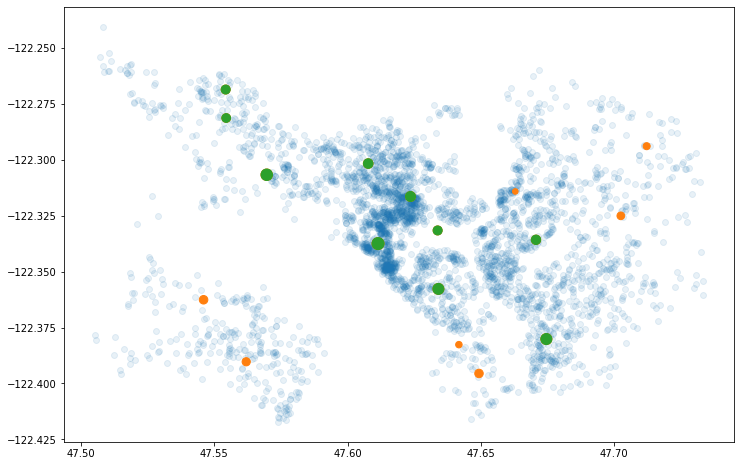

In [1740]:
plt.scatter(data['latitude'], data['longitude'], alpha=0.1)
plt.scatter(highest_rated_areas['mean_latitude'], highest_rated_areas['mean_longitude'], highest_rated_areas['mean_revenue'] / 50)
filtered_areas = highest_rated_areas.sort_values('mean_revenue', ascending=False)[0:10]
plt.scatter(filtered_areas['mean_latitude'], filtered_areas['mean_longitude'], filtered_areas['mean_revenue'] / 50)
plt.show()

In [1741]:
display(highest_rated_areas[['area', 'mean_revenue']].sort_values('mean_revenue', ascending=False)[:10])

,area,mean_revenue
6,Downtown,7247.666038
10,Beacon Hill,6606.983051
1,Ballard,6078.726087
0,Queen Anne,6038.752542
15,Capitol Hill,4951.910053
4,Central Area,4636.371274
2,Other neighborhoods,4409.843829
3,Cascade,4075.134831
13,Seward Park,4063.500000
11,Rainier Valley,3827.345912


The Top (10) Highest Revenue Earning Neighbourhoods are listed above in ascending order.

**5. What are the most widely provided amenities listed by hosts in Seattle?**

In [1742]:
amenities['count'] = 0
i = 0
for idx in amenity_types:
    amenities['count'].iloc[i] = amenity['amenity_{}'.format(idx)].sum()
    i += 1

e:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


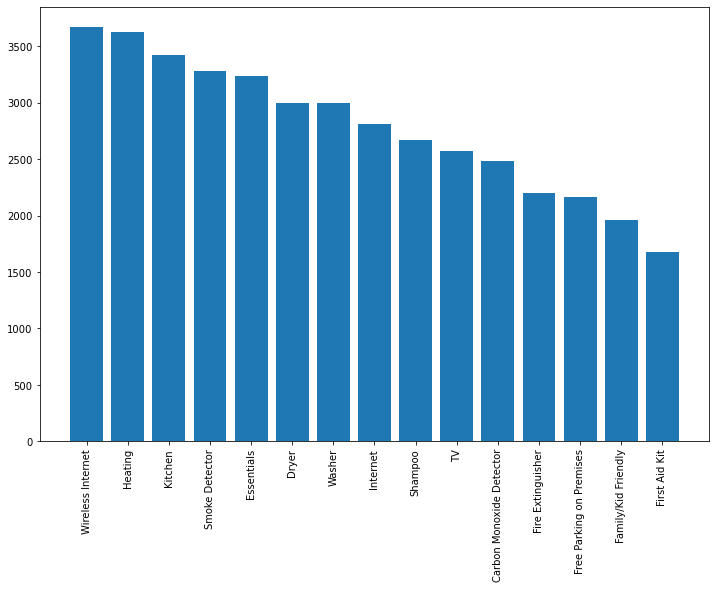

In [1743]:
plt.bar(amenities.sort_values('count', ascending=False)[:15]['amenity'], amenities.sort_values('count', ascending=False)[:15]['count'])
plt.xticks(rotation=90)
plt.show()

**Linear Regression**

As we are focusing on Linear Regression with business questions seeking inference over prediction, I have decided to avoid splitting our dataset into test and training set. Instead, I will use all observations to ensure as much explanatory power can be gleaned from our list of features to determine feature importance. I will extract the coefficients (beta parameters) from our linear regression for light interpretation and to understand the magnitude and direction of impact on our target. 

Statistical significance could have been gleaned had I written additional functions which calculate P-values, since *scikit-learn* is not specialised for non-predictive modelling. However, for the purpose of this project, I have limited myself to purely observation of coefficients in answering business questions of interest.

In [1744]:
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression

In [1745]:
def display_results(y_true, y_pred):
    rsq = metrics.r2_score(y_true, y_pred)
    mae = metrics.mean_absolute_error(y_true, y_pred) 
    mse = metrics.mean_squared_error(y_true, y_pred)

    print('R-Sq: ', round(rsq, 4))
    print('MAE: ', round(mae, 4))
    print('MSE: ', round(mse, 4))
    print('RMSE: ', round(np.sqrt(mse), 4))

**3. Which scores are most important to overall ratings?**

<AxesSubplot:>

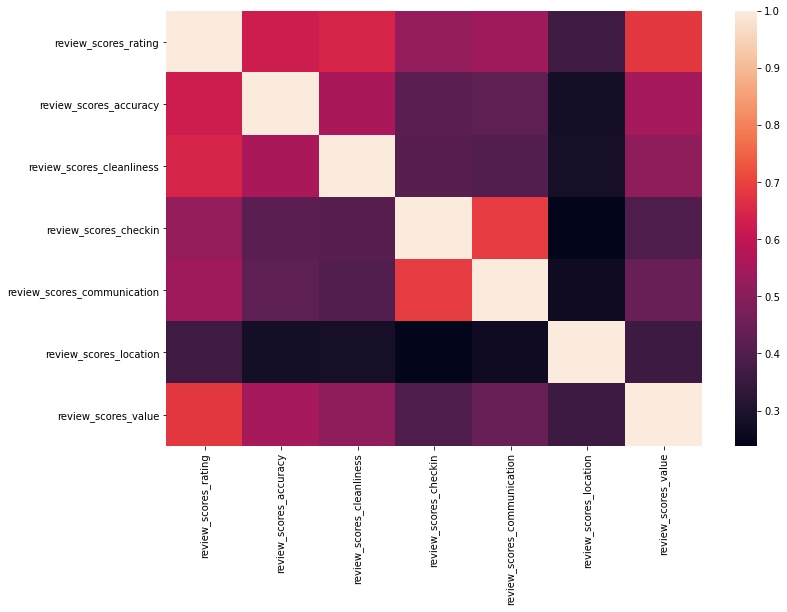

In [1746]:
sns.heatmap(data[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']].corr())

In [1747]:
pd.DataFrame(data[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']].corr()[1:4]['review_scores_rating'])

,review_scores_rating
review_scores_accuracy,0.622603
review_scores_cleanliness,0.643828
review_scores_checkin,0.522128


Positive review ratings are positively correlated with accurate listing descriptions, degree of cleanliness, and check-in experience.

In [1748]:
model = LinearRegression()

In [1749]:
x = ['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']

In [1750]:
model.fit(data[x], data['review_scores_rating'])

LinearRegression()

In [1751]:
display_results(data['review_scores_rating'], model.predict(data[x]))

R-Sq:  0.6508
MAE:  2.3451
MSE:  12.8876
RMSE:  3.5899


It appears that conducting a regression on the full dataset to achieve indicates that component review scores explain 65.08% of overall review rating in this linear regression model. We are presently not considering P-values to find whether regressors are statistically significant, but merely observing the model coefficients to determine degree of impact of regressor upon the overall rating.

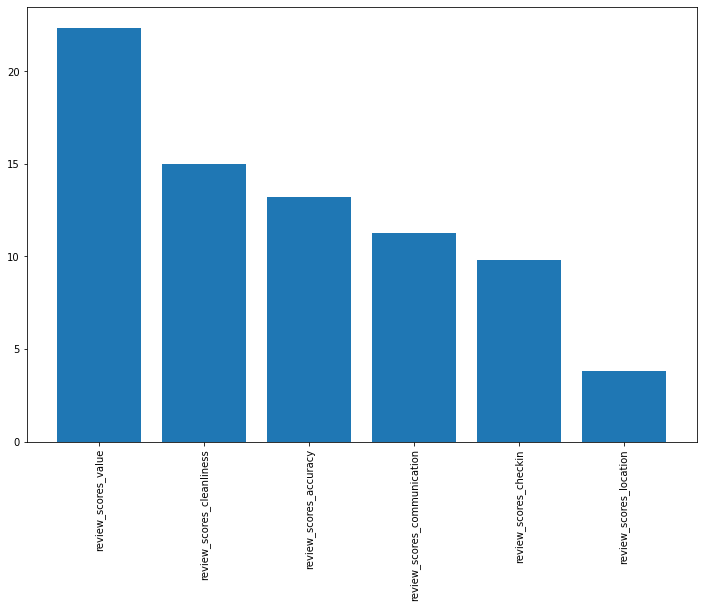

In [1752]:
coefficients = pd.DataFrame(x, columns=['regressor'])
coefficients['coefficient'] = model.coef_
plt.bar(coefficients.sort_values('coefficient', ascending=False)['regressor'], coefficients.sort_values('coefficient', ascending=False)['coefficient'])
plt.xticks(rotation=90)
plt.show()

The Top (3) review factors which impact overall rating for a host are:
1. Value
2. Cleanliness
3. Accuracy

This implies that guests put increased weight on the value for money of their stay, the cleanliness of the accomodations provided by the host, and the degree to which the host's description of their accomodations accurately match the provided description when determining their overall score for a stay.

This differs from the correlation matrix indicating that checkin experience was the third most correlated contributor to the overall rating, but otherwise relatively matches 2/3 contributors except in order of correlation to coefficient impact.

**4. Do hosts with higher ratings overall earn higher revenue?**

<AxesSubplot:>

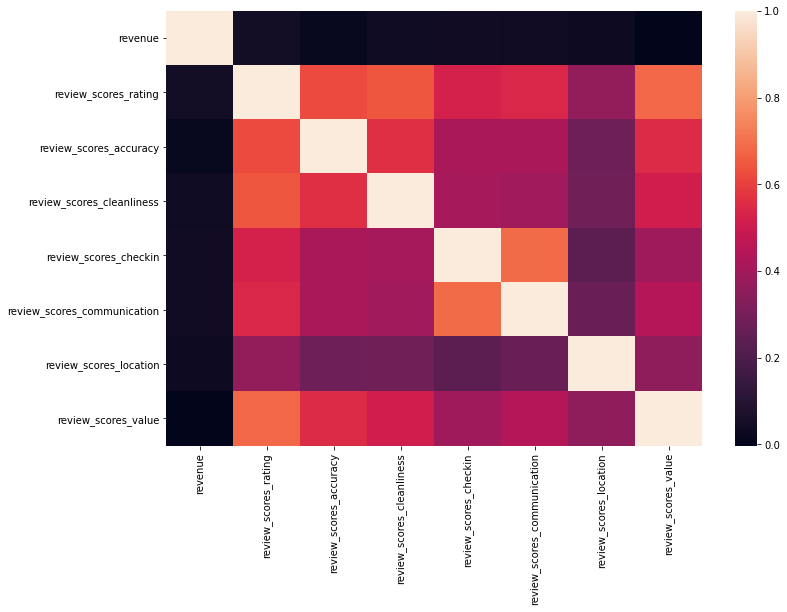

In [1753]:
sns.heatmap(data[['revenue', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']].corr())

There appears to be virtually no correlation between revenue and the composite rating / component ratings of the hosts.

In [1754]:
model = LinearRegression()

In [1755]:
x = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']

In [1756]:
model.fit(data[x], data['revenue'])

LinearRegression()

In [1757]:
display_results(data['revenue'], model.predict(data[x]))

R-Sq:  0.0053
MAE:  5394.0099
MSE:  137128616.7078
RMSE:  11710.1929


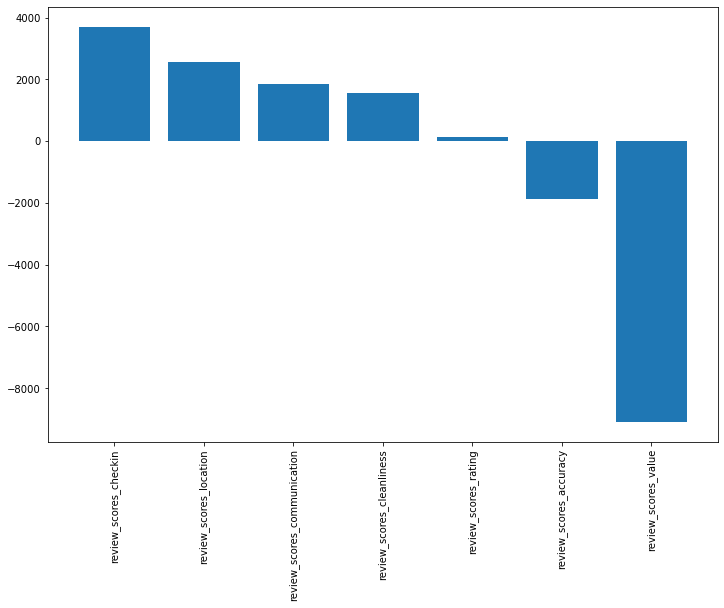

In [1758]:
coefficients = pd.DataFrame(x, columns=['regressor'])
coefficients['coefficient'] = model.coef_
plt.bar(coefficients.sort_values('coefficient', ascending=False)['regressor'], coefficients.sort_values('coefficient', ascending=False)['coefficient'])
plt.xticks(rotation=90)
plt.show()

At first, it appears that listings with high value for money ratings are largely associated with the most negative impact on estimated revenues earned. Positive ratings for checkin, location, communicativeness of the host, and cleanliness are all positively associated with estimated revenues earned. Overall ratings is positively associated with the lowest estimated revenues earned. Listings where hosts provided great value and listed accurate descriptions were associated with negative impact to estimated revenues.

However, given poor explanatory power (0.53% of target explained by features), incredibly high error in our residuals, and potentially statistically insignificant coefficients, it would be inappropriate to interpret any explanatory effect of review ratings on revenue.

**6. Which amenities, housing characteristics, and factors contribute positively to revenue?**

In [1759]:
target_revenue = pd.DataFrame(data['revenue'])
target_rating = pd.DataFrame(data['review_scores_rating'])

In [1760]:
X.drop(['listing_id', 'nbdg_Other neighborhoods', 'property_Other', 'room_Shared room', 'cancel_flexible'], axis=1, inplace=True)

GLMs require dropping a single categorical (one-hot encoded) column within each set to prevent perfect collinearity.

In [1761]:
model = LinearRegression()

In [1762]:
model.fit(X, target_revenue)

LinearRegression()

In [1763]:
display_results(target_revenue, model.predict(X))

R-Sq:  0.3283
MAE:  3291.1591
MSE:  92597197.8643
RMSE:  9622.7438


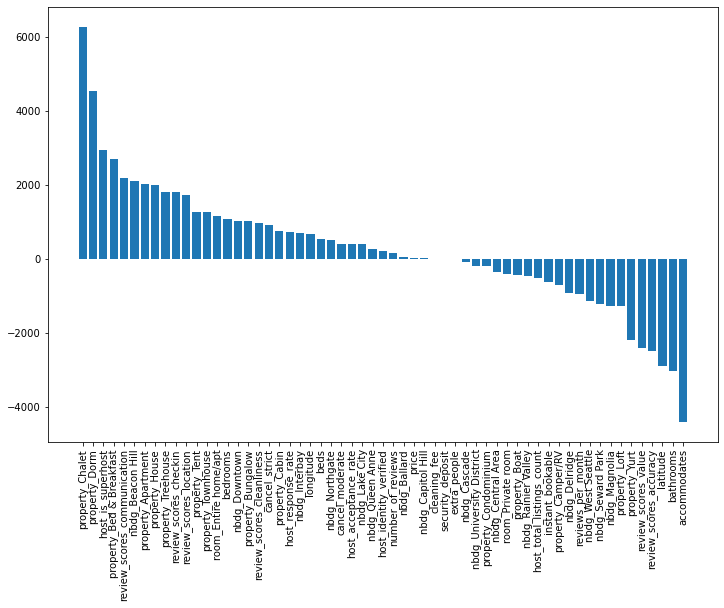

In [1764]:
coefficients = pd.DataFrame(X.columns.to_list(), columns=['regressor'])
coefficients['coefficient'] = model.coef_.T
plt.bar(coefficients.sort_values('coefficient', ascending=False)['regressor'], coefficients.sort_values('coefficient', ascending=False)['coefficient'])
plt.xticks(rotation=90)
plt.show()

**7. Which amenities, housing characteristics, and factors contribute positively to ratings?**

In [1765]:
model = LinearRegression()

In [1766]:
model.fit(X, target_rating)

LinearRegression()

In [1767]:
display_results(target_rating, model.predict(X))

R-Sq:  0.6617
MAE:  2.2952
MSE:  12.4858
RMSE:  3.5335


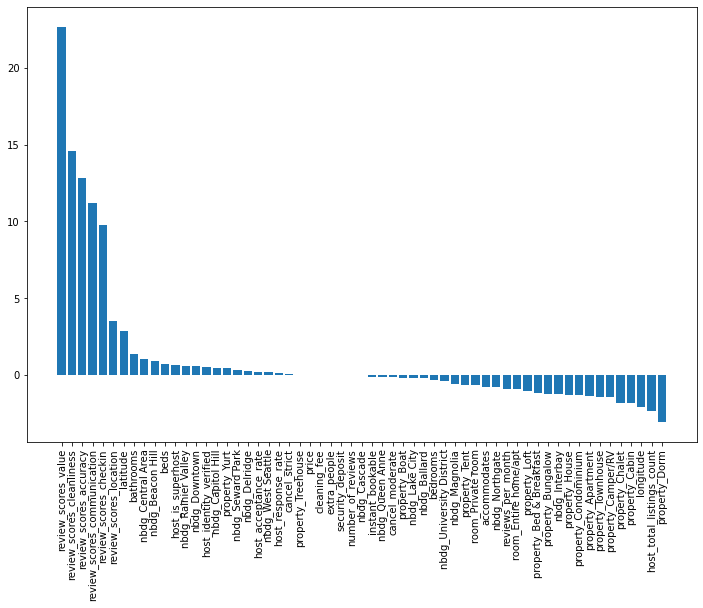

In [1768]:
coefficients = pd.DataFrame(X.columns.to_list(), columns=['regressor'])
coefficients['coefficient'] = model.coef_.T
plt.bar(coefficients.sort_values('coefficient', ascending=False)['regressor'], coefficients.sort_values('coefficient', ascending=False)['coefficient'])
plt.xticks(rotation=90)
plt.show()

___